In [1]:
import xarray as xr
import numpy as np
import datetime as dt
import calendar
import pandas as pd

from numpy.polynomial import polynomial
import matplotlib.pyplot as plt

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/')
from utils import is_month, detrend_obs

### Load

In [7]:
precip_obs_path = '/glade/derecho/scratch/kjmayer/DATA/GPCP/PRECT/daily/'
z500_obs_path   = '/glade/derecho/scratch/kjmayer/DATA/ERA5/z500/daily/'

precip_obs_finame = 'precip_daily_1996-2023_20S-20N_regrid2.5x2.5.nc'
z500_obs_finame   = 'z500_daily_1996-2023_20-90N_regrid2.5x2.5.nc'

### precip obs split

In [3]:
precip_obs = xr.open_dataset(precip_obs_path+precip_obs_finame,chunks='auto')
X2 = precip_obs.precip

In [4]:
X2_detrended  = detrend_obs(data = X2, 
                            train_data = X2, 
                            npoly = 1)

/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 28 times more chunks
  return self.array[key]


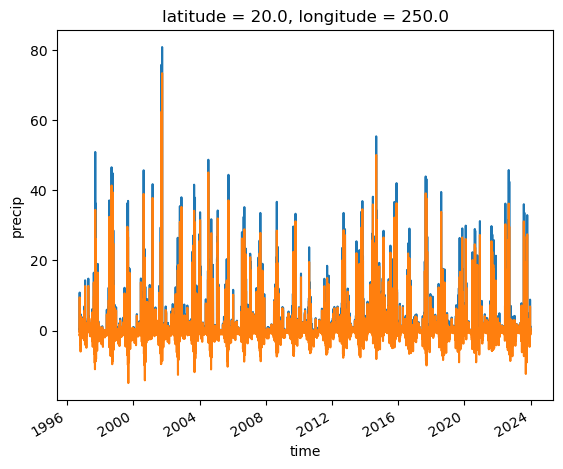

In [5]:
X2[:,16,100].plot()
X2_detrended[:,16,100].plot()
plt.show()

In [8]:
z500_obs = xr.open_dataset(z500_obs_path+z500_obs_finame,chunks='auto')
Y2 = z500_obs.Z

In [9]:
Y2_detrended  = detrend_obs(data = Y2, 
                            train_data = Y2, 
                            npoly = 1)

/glade/work/kjmayer/conda-envs/tf2-env-v2/lib/python3.9/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 14 times more chunks
  return self.array[key]


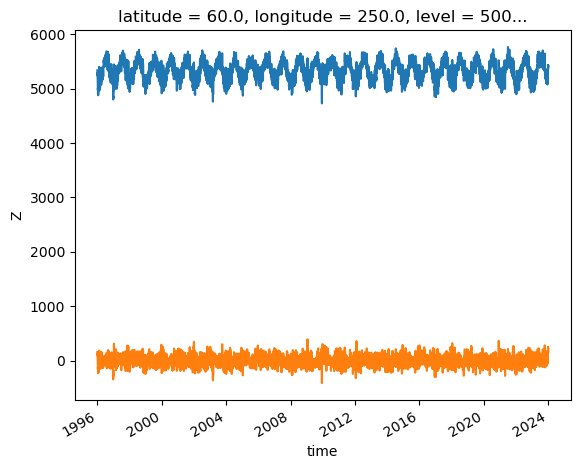

In [10]:
Y2[:,16,100].plot()
Y2_detrended[:,16,100].plot()
plt.show()

In [11]:
precip_save_path = '/glade/derecho/scratch/kjmayer/DATA/GPCP/PRECT/daily/NN_data/'
z500_save_path = '/glade/derecho/scratch/kjmayer/DATA/ERA5/z500/daily/NN_data/'

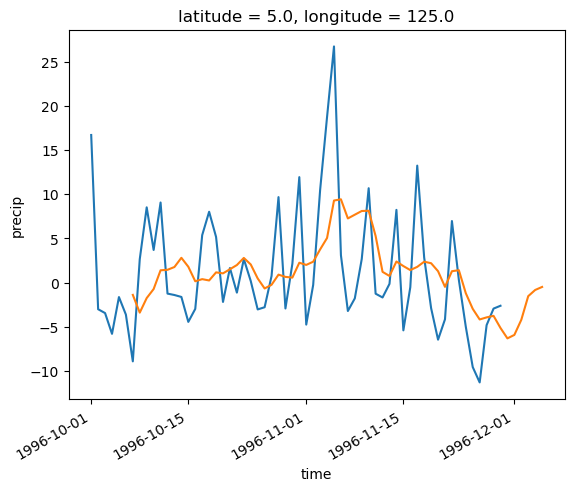

In [12]:
X2_runmean = X2_detrended.rolling(time=7,center=False).mean('time').dropna('time')
# ----------
X2_detrended[:60,10,50].plot()
X2_runmean[:60,10,50].plot()

In [13]:
print('saving')
X2_runmean.to_netcdf(precip_save_path+'precip_gpcp_7dayrunmean_1996-2023_20S-20N_regrid2.5x2.5_finetunetrain_polydetrendyrs96-23.nc')

saving


In [14]:
# ----- running mean -----
Y2_runmean = Y2_detrended.rolling(time=7,center=False).mean('time').dropna('time')
print(Y2_runmean.time[:365])
Y2_runmean = Y2_runmean.assign_coords(time=Y2.time[:-1*(7-1)])
print(Y2_runmean.time[:365])
# ----------

<xarray.DataArray 'time' (time: 365)>
array(['1996-01-07T00:00:00.000000000', '1996-01-08T00:00:00.000000000',
       '1996-01-09T00:00:00.000000000', ..., '1997-01-03T00:00:00.000000000',
       '1997-01-04T00:00:00.000000000', '1997-01-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    level    float64 500.0
  * time     (time) datetime64[ns] 1996-01-07 1996-01-08 ... 1997-01-05
Attributes:
    long_name:  time
<xarray.DataArray 'time' (time: 365)>
array(['1996-01-01T00:00:00.000000000', '1996-01-02T00:00:00.000000000',
       '1996-01-03T00:00:00.000000000', ..., '1996-12-28T00:00:00.000000000',
       '1996-12-29T00:00:00.000000000', '1996-12-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    level    float64 ...
  * time     (time) datetime64[ns] 1996-01-01 1996-01-02 ... 1996-12-30
Attributes:
    long_name:  time


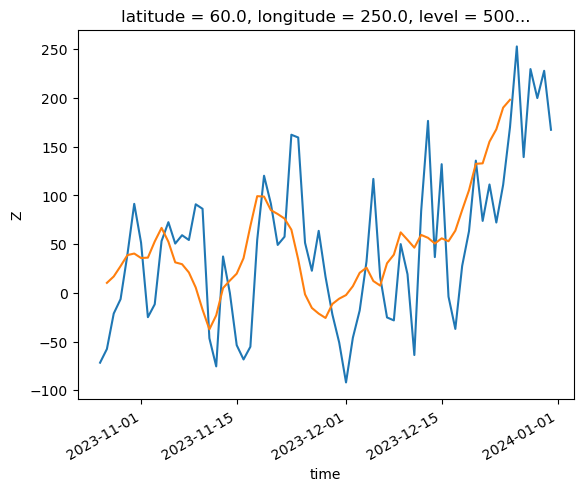

In [15]:
Y2_detrended[-67:,16,100].plot()
Y2_runmean[-60:,16,100].plot()
plt.show()

In [20]:
print('saving data')
Y2_runmean.to_netcdf(z500_save_path+'z500_daily_era5_7daymean_1996-2023_20-90N_regrid2.5x2.5_finetunetrain_polydetrendyrs96-23.nc')

saving data
